<a href="https://colab.research.google.com/github/mosh98/spotify_dataset_exploration/blob/master/Classifier_spotify_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




The following dataset is a collection of my own personal favourite songs that i listen to repeatedly

Goal of this exploration is to create a classifier and also to check out some interesting patterns using the given dataset.

**Downloading dataset and relevant Libraries**

In [27]:
!pip install spotipy

In [28]:

import pandas as pd 
import spotipy
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid ="9b7b6880f95d47b2ba93f06224a89eda" 
secret = "f0c048093ab84d8d92d0deae19203a70" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
playlist = sp.user_playlist("Madafukin hype", "2g8hYJsoq6Px5CgI2AsVZQ?si=xs2njsOkTFqPJysUarlmWA") 
songs = playlist["tracks"]["items"] 
ids = [] 
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
df = pd.DataFrame(features)

**Infomation about columns**
Audio features found from here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**dancebility -**

**key -** 
The estimated overall key of the track. Integers map to pitches using standard 

**mode **
 indicates the modality (major or minor) of a track [goes from 0-1]

**time_signature**
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)

**acousticness**
ranges form 0.0 to 1.0. a confidence measure, the higher the more acountic it is.

**energy** 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).







In [30]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.912,0.412,7,-8.074,1,0.1230,0.01650,0.012600,0.1040,0.4230,154.983,audio_features,0TlLq3lA83rQOYtrqBqSct,spotify:track:0TlLq3lA83rQOYtrqBqSct,https://api.spotify.com/v1/tracks/0TlLq3lA83rQ...,https://api.spotify.com/v1/audio-analysis/0TlL...,238614,4
1,0.838,0.771,1,-3.791,1,0.2440,0.01170,0.000000,0.0853,0.4050,175.957,audio_features,2DQ1ITjI0YoLFzuADN1ZBW,spotify:track:2DQ1ITjI0YoLFzuADN1ZBW,https://api.spotify.com/v1/tracks/2DQ1ITjI0YoL...,https://api.spotify.com/v1/audio-analysis/2DQ1...,245387,4
2,0.901,0.676,2,-7.033,1,0.2510,0.06460,0.000000,0.0863,0.4520,85.018,audio_features,5rU6kDNXZLXIinFezpbWbO,spotify:track:5rU6kDNXZLXIinFezpbWbO,https://api.spotify.com/v1/tracks/5rU6kDNXZLXI...,https://api.spotify.com/v1/audio-analysis/5rU6...,148278,4
3,0.831,0.502,10,-4.045,0,0.0460,0.10100,0.000000,0.1220,0.1010,100.541,audio_features,5ry2OE6R2zPQFDO85XkgRb,spotify:track:5ry2OE6R2zPQFDO85XkgRb,https://api.spotify.com/v1/tracks/5ry2OE6R2zPQ...,https://api.spotify.com/v1/audio-analysis/5ry2...,205427,4
4,0.906,0.545,11,-4.977,0,0.3440,0.18100,0.000000,0.0910,0.5430,139.932,audio_features,4NN6N5TxBO5k9uqu0W4gfQ,spotify:track:4NN6N5TxBO5k9uqu0W4gfQ,https://api.spotify.com/v1/tracks/4NN6N5TxBO5k...,https://api.spotify.com/v1/audio-analysis/4NN6...,186827,4
5,0.852,0.553,1,-7.286,1,0.1870,0.05590,0.000000,0.3320,0.6560,142.079,audio_features,27GmP9AWRs744SzKcpJsTZ,spotify:track:27GmP9AWRs744SzKcpJsTZ,https://api.spotify.com/v1/tracks/27GmP9AWRs74...,https://api.spotify.com/v1/audio-analysis/27Gm...,205879,4
6,0.607,0.783,9,-6.891,1,0.1390,0.00360,0.000000,0.2160,0.1820,87.026,audio_features,422lAAWQO9TqL1LxIPdhOn,spotify:track:422lAAWQO9TqL1LxIPdhOn,https://api.spotify.com/v1/tracks/422lAAWQO9Tq...,https://api.spotify.com/v1/audio-analysis/422l...,180333,4
7,0.672,0.655,10,-5.021,0,0.0311,0.03620,0.000000,0.1170,0.5560,134.945,audio_features,6Qn5zhYkTa37e91HC1D7lb,spotify:track:6Qn5zhYkTa37e91HC1D7lb,https://api.spotify.com/v1/tracks/6Qn5zhYkTa37...,https://api.spotify.com/v1/audio-analysis/6Qn5...,201240,4
8,0.944,0.613,10,-5.999,0,0.2910,0.00818,0.000000,0.0893,0.3280,120.102,audio_features,6e9biVAugkOfydEN8OiJpi,spotify:track:6e9biVAugkOfydEN8OiJpi,https://api.spotify.com/v1/tracks/6e9biVAugkOf...,https://api.spotify.com/v1/audio-analysis/6e9b...,170156,4
9,0.736,0.721,0,-4.778,1,0.0645,0.00977,0.000185,0.1490,0.2360,129.892,audio_features,5vXTilhr7U7Cv9KJ8peBGb,spotify:track:5vXTilhr7U7Cv9KJ8peBGb,https://api.spotify.com/v1/tracks/5vXTilhr7U7C...,https://api.spotify.com/v1/audio-analysis/5vXT...,154456,4


Drop a few attributes

namely: uri,track_href,analysis_url.id,type

In [31]:
def drop_unnecerray_attributes(data):

  polished_data = data.drop(['type','id','track_href','analysis_url','duration_ms'],axis=1)

  return polished_data

In [32]:
new_data = drop_unnecerray_attributes(df)
new_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,time_signature
0,0.912,0.412,7,-8.074,1,0.1230,0.01650,0.012600,0.1040,0.4230,154.983,spotify:track:0TlLq3lA83rQOYtrqBqSct,4
1,0.838,0.771,1,-3.791,1,0.2440,0.01170,0.000000,0.0853,0.4050,175.957,spotify:track:2DQ1ITjI0YoLFzuADN1ZBW,4
2,0.901,0.676,2,-7.033,1,0.2510,0.06460,0.000000,0.0863,0.4520,85.018,spotify:track:5rU6kDNXZLXIinFezpbWbO,4
3,0.831,0.502,10,-4.045,0,0.0460,0.10100,0.000000,0.1220,0.1010,100.541,spotify:track:5ry2OE6R2zPQFDO85XkgRb,4
4,0.906,0.545,11,-4.977,0,0.3440,0.18100,0.000000,0.0910,0.5430,139.932,spotify:track:4NN6N5TxBO5k9uqu0W4gfQ,4
5,0.852,0.553,1,-7.286,1,0.1870,0.05590,0.000000,0.3320,0.6560,142.079,spotify:track:27GmP9AWRs744SzKcpJsTZ,4
6,0.607,0.783,9,-6.891,1,0.1390,0.00360,0.000000,0.2160,0.1820,87.026,spotify:track:422lAAWQO9TqL1LxIPdhOn,4
7,0.672,0.655,10,-5.021,0,0.0311,0.03620,0.000000,0.1170,0.5560,134.945,spotify:track:6Qn5zhYkTa37e91HC1D7lb,4
8,0.944,0.613,10,-5.999,0,0.2910,0.00818,0.000000,0.0893,0.3280,120.102,spotify:track:6e9biVAugkOfydEN8OiJpi,4
9,0.736,0.721,0,-4.778,1,0.0645,0.00977,0.000185,0.1490,0.2360,129.892,spotify:track:5vXTilhr7U7Cv9KJ8peBGb,4


#Valence and Acousticness
Trying to find out potential relationship between songs with valence and acousticness

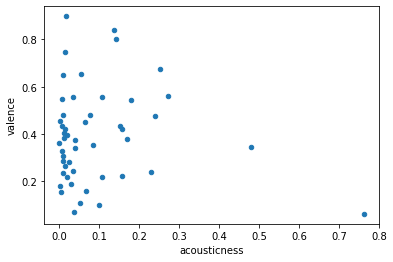

In [40]:
 valence_acousticness = new_data[['valence','acousticness']]
 valence_acousticness.plot.scatter(x = 'acousticness',y='valence')

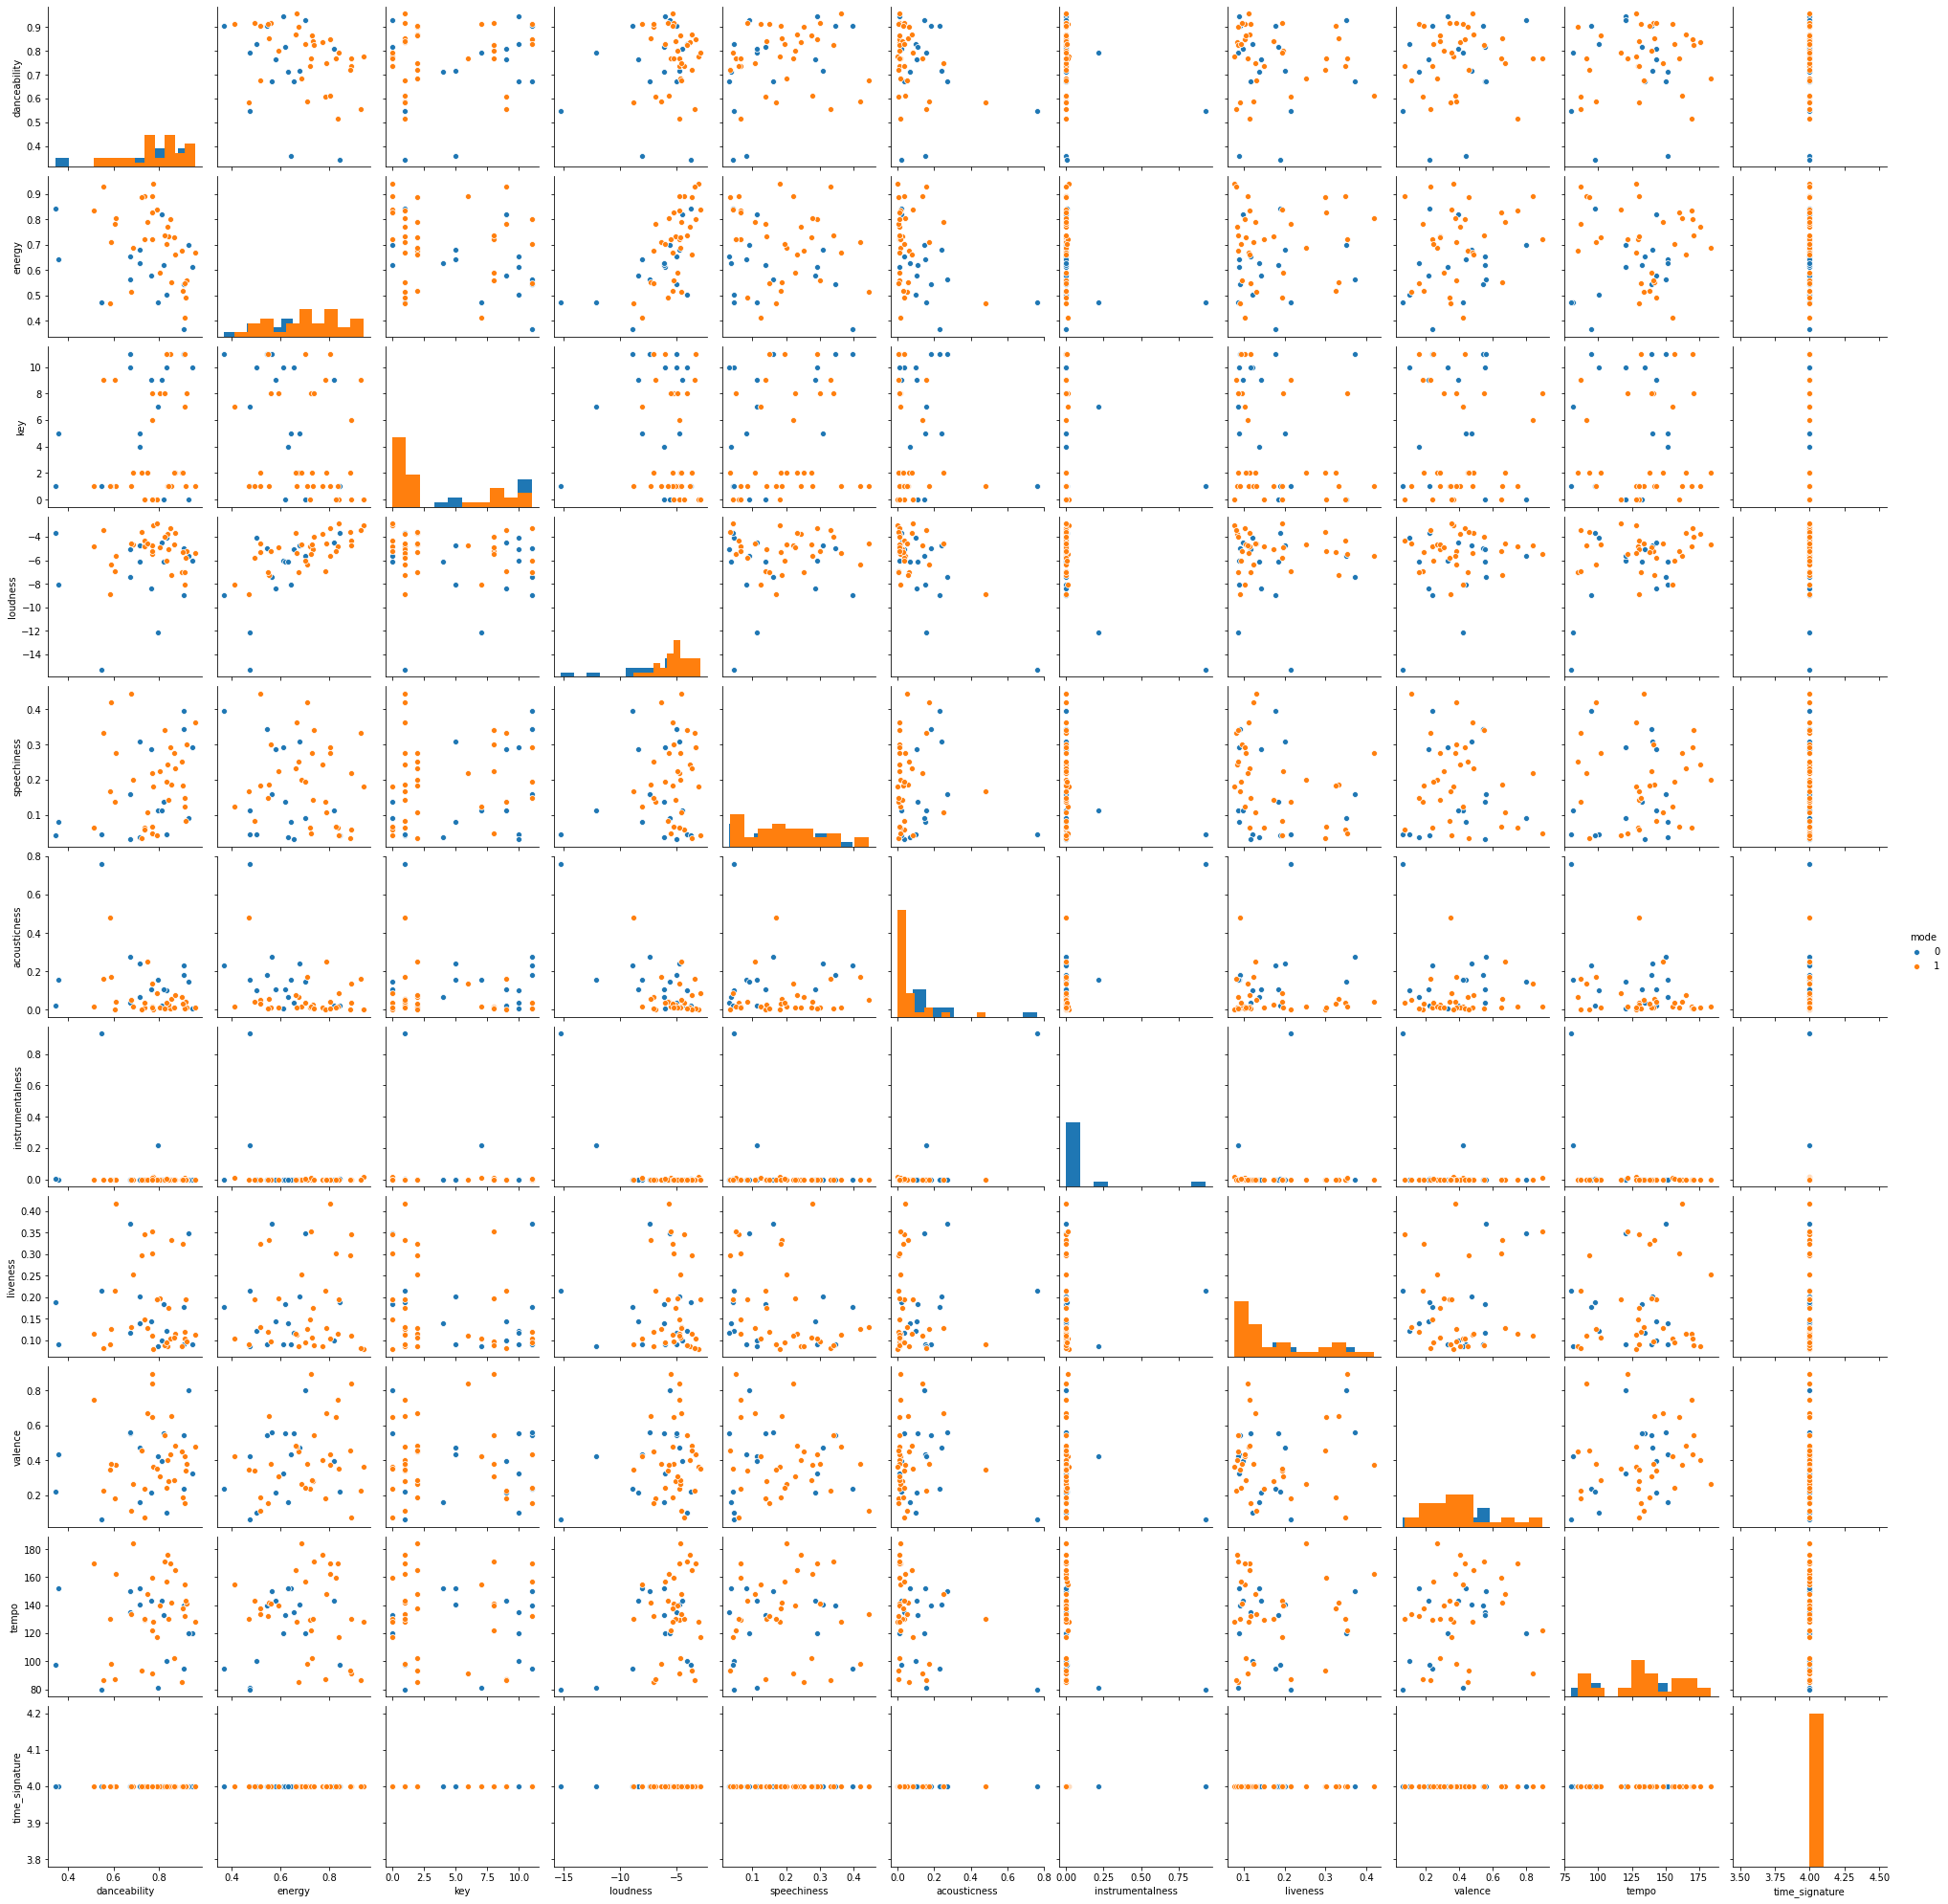

In [33]:

#didn't need to take a small sample of data as the data consists of 29 rows anyways.
#Quick PairPlot cuz why not kid
sns.pairplot(new_data.drop(['uri'],axis =1) ,hue='mode',diag_kind='hist')

**Dimentionality Reduction**


> PCA






#K-NN

In [34]:
from sklearn.neighbors import KNeighborsClassifier


In [35]:
neight = KNeighborsClassifier(n_neightbors = 3)
neight.fit()

TypeError: ignored